In [2]:
#creating a dataframe from the file with the dataset 
#import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
housing = pd.read_csv("Housing.csv")
housing = housing.sort_values(by = "area", ascending = True)
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
449,3150000,1650,3,1,2,no,no,yes,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
413,3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished


In [3]:
#eliminate attributes which have qualitative data 
columns_and_types = housing.dtypes
attribute_list = []
for attribute in housing.columns: 
    if columns_and_types.get(key = attribute) == object:
        attribute_list.append(attribute)
        #housing.drop(columns = [attribute]) (this wouldn't work for some reason)
#print(attribute_list)
for column in housing.columns: 
    if column in attribute_list: 
        housing.drop(column,axis=1,inplace=True)

In [7]:
#feature scale big values using min/max scaling 
#find a better comparision to normalize rows 
#min = housing.min()
#print(min)
for element in housing.keys():
    for value in housing[element]:
        housing[element] = housing[element].replace([value], (value - housing[element].min())/(housing[element].max() - housing[element].min()))
housing


,price,area,bedrooms,bathrooms,stories,parking
449,0.000000,0.000000,0.314286,0.00,0.185185,0.000000
537,0.142105,0.104938,0.314286,0.00,0.185185,0.000000
527,0.171053,0.113333,0.183673,0.00,0.000000,0.000000
271,0.326316,0.117593,0.800000,0.00,0.185185,0.000000
413,0.257895,0.120370,0.314286,0.50,0.185185,0.000000
...,...,...,...,...,...,...
403,0.263158,0.799012,0.314286,0.00,0.000000,0.000000
10,0.736842,0.814815,0.314286,0.00,0.185185,0.666667
66,0.565714,0.814815,0.183673,0.00,0.000000,0.333333
125,1.000000,0.962963,0.314286,0.00,0.000000,0.666667


In [5]:
price_vals = []
area_vals = []
bedroom_vals = []
bathroom_vals = []
stories_vals = []
parking_vals = []
for (price, area, bedroom, bathroom, stories, parking) in zip(housing.get('price'), housing.get('area'), housing.get('bedrooms'), housing.get('bathrooms'), housing.get('stories'), housing.get('parking')): 
    price_vals.append(price)
    area_vals.append(area)
    bedroom_vals.append(bedroom)
    bathroom_vals.append(bathroom)
    stories_vals.append(stories)
    parking_vals.append(parking)

In [53]:
#vary w and b together 
gradient_graph = []
b = 0.5
w_area = 0.2
w_bedroom = 0.2
w_bathroom = 0.2
w_stories = 0.2
w_parking = 0.2

lows = []

prev_total_cost = 0
total_cost = 0
prev_total_cost_b = 0
total_cost_b = 0
changed_price_vals = []
changed_price_vals_b = []
cost_function_vals = []
cost_function_b = []

#print(len(price_vals))
for i in range(0, len(price_vals)):
    new_price = area_vals[i]*w_area + bedroom_vals[i]*w_bedroom + bathroom_vals[i]*w_bathroom + stories_vals[i]*w_stories + parking_vals[i]*w_parking + b
    #print("new price calculated " + str(new_price))
    changed_price_vals.append(new_price)
for i in range (0, len(changed_price_vals)):
    #print("i is " + str(i))
    cost = (changed_price_vals[i] - price_vals[i])**2
    cost_function_vals.append(cost)
    total_cost = total_cost + cost_function_vals[i] 
    #print("Adding to total cost " + str(cost))
total_cost = total_cost/len(changed_price_vals)
prev_total_cost = total_cost 
print("Initial total cost " + str(total_cost))
print("Initial previous total cost " + str(prev_total_cost))

learning_rate = 2
op_count = 0
op_count_b = 0
#print(total_cost)
#print(prev_total_cost)
while(op_count < 400): 
    op_count_b = 0
    while(prev_total_cost_b > total_cost_b or op_count_b == 0 or op_count_b == 1):
        if op_count_b == 0:
            b = 0.5
            #print("entering loop with total cost in b_calc " + str(prev_total_cost_b))
            #print("entering loop with total cost in b_calc " + str(total_cost_b))
        prev_total_cost_b = total_cost_b
        total_cost_b = 0
        #print("operation count is now " + str(op_count))
        if(op_count_b > 0):
            b = b - learning_rate*gradient_descent_cost_b
            #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
        #print("b value is " + str(b))
        gradient_descent_cost_b = 0
        changed_price_vals_b =  []
        cost_function_vals_b = []
        #print(changed_price_vals_b)
        #print(cost_function_vals_b)
        #print("Still in b_calc")
        for i in range(0, len(price_vals)):
            new_price = area_vals[i]*w_area + bedroom_vals[i]*w_bedroom + bathroom_vals[i]*w_bathroom + stories_vals[i]*w_stories + parking_vals[i]*w_parking + b
            changed_price_vals_b.append(new_price)
            #print("new prices values: " + str(new_price))
        for i in range (0, len(changed_price_vals_b)):
            cost = (changed_price_vals_b[i] - price_vals[i])**2
            gradient_descent_cost_b = gradient_descent_cost_b + (changed_price_vals_b[i] - price_vals[i])
            cost_function_vals_b.append(cost)
            total_cost_b = total_cost_b + cost_function_vals_b[i] 
        total_cost_b = total_cost_b/len(changed_price_vals_b)
        #print("total cost becomes " + str(total_cost))
        #print("previous total cost is " + str(prev_total_cost))
        gradient_descent_cost_b = gradient_descent_cost_b/(len(changed_price_vals_b)*2)
        #print("gradient descent cost final " + str(gradient_descent_cost_b))
        op_count_b = op_count_b + 1
        #print("previous total cost in b_calc " + str(prev_total_cost_b))
        #print("total cost in b_calc " + str(total_cost_b))
        #print("op_count_b value " + str(op_count_b))
    #print("current b value " + str(b))
    #print("current total cost " + str(prev_total_cost))
    #print("Back in w calc")
    prev_total_cost = total_cost
    total_cost = 0
    #print("operation count is now " + str(op_count))
    if(op_count > 0):
        w_area = w_area - learning_rate*area_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    area_gradient_descent_cost = 0
    changed_price_vals =  []
    cost_function_vals = []
    #print(changed_price_vals)
    #print(cost_function_vals)
    for i in range(0, len(price_vals)):
        new_price = area_vals[i]*w_area + bedroom_vals[i]*w_bedroom + bathroom_vals[i]*w_bathroom + stories_vals[i]*w_stories + parking_vals[i]*w_parking + b
        changed_price_vals.append(new_price)
        #print("new prices values: " + str(new_price))
    for i in range (0, len(changed_price_vals)):
        cost = (changed_price_vals[i] - price_vals[i])**2
        area_gradient_descent_cost = area_gradient_descent_cost + ((changed_price_vals[i] - price_vals[i])*area_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_price_vals)
    print("total cost with area becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    area_gradient_descent_cost = area_gradient_descent_cost/(len(changed_price_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append((total_cost, w_area, w_bedroom, w_bathroom, w_stories, w_parking, b))
    prev_total_cost = total_cost
    total_cost = 0
    
    if(op_count > 0):
        w_bedroom = w_bedroom - learning_rate*bedroom_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    bedroom_gradient_descent_cost = 0
    changed_price_vals =  []
    cost_function_vals = []
    #print(changed_price_vals)
    #print(cost_function_vals)
    for i in range(0, len(price_vals)):
        new_price = area_vals[i]*w_area + bedroom_vals[i]*w_bedroom + bathroom_vals[i]*w_bathroom + stories_vals[i]*w_stories + parking_vals[i]*w_parking + b
        changed_price_vals.append(new_price)
        #print("new prices values: " + str(new_price))
    for i in range (0, len(changed_price_vals)):
        cost = (changed_price_vals[i] - price_vals[i])**2
        bedroom_gradient_descent_cost = bedroom_gradient_descent_cost + ((changed_price_vals[i] - price_vals[i])*bedroom_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_price_vals)
    print("total cost with bedrooms becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    bedroom_gradient_descent_cost = bedroom_gradient_descent_cost/(len(changed_price_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_area, w_bedroom, w_bathroom, w_stories, w_parking, b])
    prev_total_cost = total_cost
    total_cost = 0
    
    if(op_count > 0):
        w_bathroom = w_bathroom - learning_rate*bathroom_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    bathroom_gradient_descent_cost = 0
    changed_price_vals =  []
    cost_function_vals = []
    #print(changed_price_vals)
    #print(cost_function_vals)
    for i in range(0, len(price_vals)):
        new_price = area_vals[i]*w_area + bedroom_vals[i]*w_bedroom + bathroom_vals[i]*w_bathroom + stories_vals[i]*w_stories + parking_vals[i]*w_parking + b
        changed_price_vals.append(new_price)
        #print("new prices values: " + str(new_price))
    for i in range (0, len(changed_price_vals)):
        cost = (changed_price_vals[i] - price_vals[i])**2
        bathroom_gradient_descent_cost = bathroom_gradient_descent_cost + ((changed_price_vals[i] - price_vals[i])*bathroom_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_price_vals)
    print("total cost with bedrooms becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    bathroom_gradient_descent_cost = bathroom_gradient_descent_cost/(len(changed_price_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_area, w_bedroom, w_bathroom, w_stories, w_parking, b])
    prev_total_cost = total_cost
    total_cost = 0
    
    
    if(op_count > 0):
        w_stories = w_stories - learning_rate*stories_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    stories_gradient_descent_cost = 0
    changed_price_vals =  []
    cost_function_vals = []
    #print(changed_price_vals)
    #print(cost_function_vals)
    for i in range(0, len(price_vals)):
        new_price = area_vals[i]*w_area + bedroom_vals[i]*w_bedroom + bathroom_vals[i]*w_bathroom + stories_vals[i]*w_stories + parking_vals[i]*w_parking + b
        changed_price_vals.append(new_price)
        #print("new prices values: " + str(new_price))
    for i in range (0, len(changed_price_vals)):
        cost = (changed_price_vals[i] - price_vals[i])**2
        stories_gradient_descent_cost = stories_gradient_descent_cost + ((changed_price_vals[i] - price_vals[i])*stories_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_price_vals)
    print("total cost with bedrooms becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    stories_gradient_descent_cost = stories_gradient_descent_cost/(len(changed_price_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_area, w_bedroom, w_bathroom, w_stories, w_parking, b])
    prev_total_cost = total_cost
    total_cost = 0
    
    if(op_count > 0):
        w_parking = w_parking - learning_rate*parking_gradient_descent_cost
        #print(" subtracting {} from b value".format(learning_rate*gradient_descent_cost))
    #print("w value is " + str(w))
    #print(" b value is " + str(b))
    parking_gradient_descent_cost = 0
    changed_price_vals =  []
    cost_function_vals = []
    #print(changed_price_vals)
    #print(cost_function_vals)
    for i in range(0, len(price_vals)):
        new_price = area_vals[i]*w_area + bedroom_vals[i]*w_bedroom + bathroom_vals[i]*w_bathroom + stories_vals[i]*w_stories + parking_vals[i]*w_parking + b
        changed_price_vals.append(new_price)
        #print("new prices values: " + str(new_price))
    for i in range (0, len(changed_price_vals)):
        cost = (changed_price_vals[i] - price_vals[i])**2
        parking_gradient_descent_cost = parking_gradient_descent_cost + ((changed_price_vals[i] - price_vals[i])*parking_vals[i])
        #print("gradient descent cost updated with " + str(gradient_descent_cost))
        cost_function_vals.append(cost)
        total_cost = total_cost + cost_function_vals[i] 
    total_cost = total_cost/len(changed_price_vals)
    print("total cost with bedrooms becomes " + str(total_cost))
    print("previous total cost is " + str(prev_total_cost))
    parking_gradient_descent_cost = parking_gradient_descent_cost/(len(changed_price_vals)*2)
    gradient_graph.append(total_cost)
    if(prev_total_cost < total_cost):
        lows.append([total_cost, w_area, w_bedroom, w_bathroom, w_stories, w_parking, b])
    #prev_total_cost = total_cost
    #total_cost = 0
    
    
    op_count = op_count + 1
    print("Running")
min = total_cost
for i in lows:
    if(i[0] < min):
        min = i[0]
        total_cost = i[0]
        w_area = i[1]
        w_bedroom = i[2]
        w_bathroom = i[3]
        w_stories = i[4]
        w_parking = i[5]
    
print("Final w_area value " + str(w_area))
print("Final w_bedroom value " + str(w_bedroom))
print("Final w_bathroom value " + str(w_bathroom))
print("Final w_stories value " + str(w_stories))
print("Final w_parking value " + str(w_parking))


print("Final b value " + str(b))
print("Final total cost " + str(total_cost))

Initial total cost [0.19767065]
Initial previous total cost [0.19767065]
total cost with area becomes [0.01304433]
previous total cost is [0.19767065]
total cost with bedrooms becomes [0.01304433]
previous total cost is [0.01304433]
total cost with bedrooms becomes [0.01304433]
previous total cost is [0.01304433]
total cost with bedrooms becomes [0.01304433]
previous total cost is [0.01304433]
total cost with bedrooms becomes [0.01304433]
previous total cost is [0.01304433]
Running
total cost with area becomes [0.01302196]
previous total cost is [0.01304433]
total cost with bedrooms becomes [0.01301155]
previous total cost is [0.01302196]
total cost with bedrooms becomes [0.013]
previous total cost is [0.01301155]
total cost with bedrooms becomes [0.0129878]
previous total cost is [0.013]
total cost with bedrooms becomes [0.01292183]
previous total cost is [0.0129878]
Running
total cost with area becomes [0.0128955]
previous total cost is [0.01292183]
total cost with bedrooms becomes [

total cost with area becomes [0.01188685]
previous total cost is [0.01190692]
total cost with bedrooms becomes [0.01188397]
previous total cost is [0.01188685]
total cost with bedrooms becomes [0.01188389]
previous total cost is [0.01188397]
total cost with bedrooms becomes [0.011883]
previous total cost is [0.01188389]
total cost with bedrooms becomes [0.01187888]
previous total cost is [0.011883]
Running
total cost with area becomes [0.01185915]
previous total cost is [0.01187888]
total cost with bedrooms becomes [0.01185641]
previous total cost is [0.01185915]
total cost with bedrooms becomes [0.01185636]
previous total cost is [0.01185641]
total cost with bedrooms becomes [0.01185556]
previous total cost is [0.01185636]
total cost with bedrooms becomes [0.01185186]
previous total cost is [0.01185556]
Running
total cost with area becomes [0.01183249]
previous total cost is [0.01185186]
total cost with bedrooms becomes [0.01182988]
previous total cost is [0.01183249]
total cost with 

total cost with area becomes [0.01147447]
previous total cost is [0.01148752]
total cost with bedrooms becomes [0.01147322]
previous total cost is [0.01147447]
total cost with bedrooms becomes [0.01147321]
previous total cost is [0.01147322]
total cost with bedrooms becomes [0.01147309]
previous total cost is [0.01147321]
total cost with bedrooms becomes [0.01147233]
previous total cost is [0.01147309]
Running
total cost with area becomes [0.0114596]
previous total cost is [0.01147233]
total cost with bedrooms becomes [0.01145839]
previous total cost is [0.0114596]
total cost with bedrooms becomes [0.01145838]
previous total cost is [0.01145839]
total cost with bedrooms becomes [0.01145827]
previous total cost is [0.01145838]
total cost with bedrooms becomes [0.01145756]
previous total cost is [0.01145827]
Running
total cost with area becomes [0.01144514]
previous total cost is [0.01145756]
total cost with bedrooms becomes [0.01144397]
previous total cost is [0.01144514]
total cost wit

total cost with area becomes [0.01121817]
previous total cost is [0.01122537]
total cost with bedrooms becomes [0.0112176]
previous total cost is [0.01121817]
total cost with bedrooms becomes [0.01121759]
previous total cost is [0.0112176]
total cost with bedrooms becomes [0.01121757]
previous total cost is [0.01121759]
total cost with bedrooms becomes [0.01121732]
previous total cost is [0.01121757]
Running
total cost with area becomes [0.0112103]
previous total cost is [0.01121732]
total cost with bedrooms becomes [0.01120975]
previous total cost is [0.0112103]
total cost with bedrooms becomes [0.01120975]
previous total cost is [0.01120975]
total cost with bedrooms becomes [0.01120973]
previous total cost is [0.01120975]
total cost with bedrooms becomes [0.01120948]
previous total cost is [0.01120973]
Running
total cost with area becomes [0.01120266]
previous total cost is [0.01120948]
total cost with bedrooms becomes [0.01120212]
previous total cost is [0.01120266]
total cost with 

total cost with bedrooms becomes [0.01109524]
previous total cost is [0.01109537]
Running
total cost with area becomes [0.01109115]
previous total cost is [0.01109524]
total cost with bedrooms becomes [0.01109086]
previous total cost is [0.01109115]
total cost with bedrooms becomes [0.01109086]
previous total cost is [0.01109086]
total cost with bedrooms becomes [0.01109086]
previous total cost is [0.01109086]
total cost with bedrooms becomes [0.01109073]
previous total cost is [0.01109086]
Running
total cost with area becomes [0.01108674]
previous total cost is [0.01109073]
total cost with bedrooms becomes [0.01108647]
previous total cost is [0.01108674]
total cost with bedrooms becomes [0.01108647]
previous total cost is [0.01108647]
total cost with bedrooms becomes [0.01108646]
previous total cost is [0.01108647]
total cost with bedrooms becomes [0.01108634]
previous total cost is [0.01108646]
Running
total cost with area becomes [0.01108246]
previous total cost is [0.01108634]
tota

total cost with area becomes [0.01102257]
previous total cost is [0.01102495]
total cost with bedrooms becomes [0.01102242]
previous total cost is [0.01102257]
total cost with bedrooms becomes [0.01102242]
previous total cost is [0.01102242]
total cost with bedrooms becomes [0.01102242]
previous total cost is [0.01102242]
total cost with bedrooms becomes [0.01102235]
previous total cost is [0.01102242]
Running
total cost with area becomes [0.01102004]
previous total cost is [0.01102235]
total cost with bedrooms becomes [0.0110199]
previous total cost is [0.01102004]
total cost with bedrooms becomes [0.0110199]
previous total cost is [0.0110199]
total cost with bedrooms becomes [0.0110199]
previous total cost is [0.0110199]
total cost with bedrooms becomes [0.01101982]
previous total cost is [0.0110199]
Running
total cost with area becomes [0.01101757]
previous total cost is [0.01101982]
total cost with bedrooms becomes [0.01101744]
previous total cost is [0.01101757]
total cost with be

total cost with bedrooms becomes [0.01098016]
previous total cost is [0.01098023]
total cost with bedrooms becomes [0.01098016]
previous total cost is [0.01098016]
total cost with bedrooms becomes [0.01098016]
previous total cost is [0.01098016]
total cost with bedrooms becomes [0.01098012]
previous total cost is [0.01098016]
Running
total cost with area becomes [0.01097885]
previous total cost is [0.01098012]
total cost with bedrooms becomes [0.01097878]
previous total cost is [0.01097885]
total cost with bedrooms becomes [0.01097878]
previous total cost is [0.01097878]
total cost with bedrooms becomes [0.01097878]
previous total cost is [0.01097878]
total cost with bedrooms becomes [0.01097875]
previous total cost is [0.01097878]
Running
total cost with area becomes [0.01097751]
previous total cost is [0.01097875]
total cost with bedrooms becomes [0.01097744]
previous total cost is [0.01097751]
total cost with bedrooms becomes [0.01097744]
previous total cost is [0.01097744]
total co

total cost with bedrooms becomes [0.01095712]
previous total cost is [0.01095714]
Running
total cost with area becomes [0.01095642]
previous total cost is [0.01095712]
total cost with bedrooms becomes [0.01095639]
previous total cost is [0.01095642]
total cost with bedrooms becomes [0.01095639]
previous total cost is [0.01095639]
total cost with bedrooms becomes [0.01095639]
previous total cost is [0.01095639]
total cost with bedrooms becomes [0.01095637]
previous total cost is [0.01095639]
Running
total cost with area becomes [0.01095569]
previous total cost is [0.01095637]
total cost with bedrooms becomes [0.01095566]
previous total cost is [0.01095569]
total cost with bedrooms becomes [0.01095566]
previous total cost is [0.01095566]
total cost with bedrooms becomes [0.01095566]
previous total cost is [0.01095566]
total cost with bedrooms becomes [0.01095564]
previous total cost is [0.01095566]
Running
total cost with area becomes [0.01095498]
previous total cost is [0.01095564]
tota

total cost with bedrooms becomes [0.01094503]
previous total cost is [0.01094503]
total cost with bedrooms becomes [0.01094503]
previous total cost is [0.01094503]
total cost with bedrooms becomes [0.01094501]
previous total cost is [0.01094503]
Running
total cost with area becomes [0.01094462]
previous total cost is [0.01094501]
total cost with bedrooms becomes [0.01094461]
previous total cost is [0.01094462]
total cost with bedrooms becomes [0.01094461]
previous total cost is [0.01094461]
total cost with bedrooms becomes [0.01094461]
previous total cost is [0.01094461]
total cost with bedrooms becomes [0.01094459]
previous total cost is [0.01094461]
Running
total cost with area becomes [0.01094421]
previous total cost is [0.01094459]
total cost with bedrooms becomes [0.0109442]
previous total cost is [0.01094421]
total cost with bedrooms becomes [0.0109442]
previous total cost is [0.0109442]
total cost with bedrooms becomes [0.0109442]
previous total cost is [0.0109442]
total cost wi

total cost with area becomes [0.01093825]
previous total cost is [0.01093848]
total cost with bedrooms becomes [0.01093824]
previous total cost is [0.01093825]
total cost with bedrooms becomes [0.01093824]
previous total cost is [0.01093824]
total cost with bedrooms becomes [0.01093824]
previous total cost is [0.01093824]
total cost with bedrooms becomes [0.01093823]
previous total cost is [0.01093824]
Running
total cost with area becomes [0.01093801]
previous total cost is [0.01093823]
total cost with bedrooms becomes [0.01093801]
previous total cost is [0.01093801]
total cost with bedrooms becomes [0.01093801]
previous total cost is [0.01093801]
total cost with bedrooms becomes [0.01093801]
previous total cost is [0.01093801]
total cost with bedrooms becomes [0.010938]
previous total cost is [0.01093801]
Running
total cost with area becomes [0.01093778]
previous total cost is [0.010938]
total cost with bedrooms becomes [0.01093778]
previous total cost is [0.01093778]
total cost with 

total cost with bedrooms becomes [0.01093458]
previous total cost is [0.01093458]
total cost with bedrooms becomes [0.01093458]
previous total cost is [0.01093458]
total cost with bedrooms becomes [0.01093458]
previous total cost is [0.01093458]
total cost with bedrooms becomes [0.01093457]
previous total cost is [0.01093458]
Running
total cost with area becomes [0.01093445]
previous total cost is [0.01093457]
total cost with bedrooms becomes [0.01093444]
previous total cost is [0.01093445]
total cost with bedrooms becomes [0.01093444]
previous total cost is [0.01093444]
total cost with bedrooms becomes [0.01093444]
previous total cost is [0.01093444]
total cost with bedrooms becomes [0.01093444]
previous total cost is [0.01093444]
Running
total cost with area becomes [0.01093431]
previous total cost is [0.01093444]
total cost with bedrooms becomes [0.01093431]
previous total cost is [0.01093431]
total cost with bedrooms becomes [0.01093431]
previous total cost is [0.01093431]
total co

total cost with area becomes [0.01093239]
previous total cost is [0.01093247]
total cost with bedrooms becomes [0.01093239]
previous total cost is [0.01093239]
total cost with bedrooms becomes [0.01093239]
previous total cost is [0.01093239]
total cost with bedrooms becomes [0.01093239]
previous total cost is [0.01093239]
total cost with bedrooms becomes [0.01093239]
previous total cost is [0.01093239]
Running
total cost with area becomes [0.01093232]
previous total cost is [0.01093239]
total cost with bedrooms becomes [0.01093232]
previous total cost is [0.01093232]
total cost with bedrooms becomes [0.01093232]
previous total cost is [0.01093232]
total cost with bedrooms becomes [0.01093232]
previous total cost is [0.01093232]
total cost with bedrooms becomes [0.01093231]
previous total cost is [0.01093232]
Running
total cost with area becomes [0.01093224]
previous total cost is [0.01093231]
total cost with bedrooms becomes [0.01093224]
previous total cost is [0.01093224]
total cost w

total cost with bedrooms becomes [0.01093121]
previous total cost is [0.01093121]
total cost with bedrooms becomes [0.01093121]
previous total cost is [0.01093121]
Running
total cost with area becomes [0.01093117]
previous total cost is [0.01093121]
total cost with bedrooms becomes [0.01093117]
previous total cost is [0.01093117]
total cost with bedrooms becomes [0.01093117]
previous total cost is [0.01093117]
total cost with bedrooms becomes [0.01093117]
previous total cost is [0.01093117]
total cost with bedrooms becomes [0.01093117]
previous total cost is [0.01093117]
Running
total cost with area becomes [0.01093113]
previous total cost is [0.01093117]
total cost with bedrooms becomes [0.01093112]
previous total cost is [0.01093113]
total cost with bedrooms becomes [0.01093112]
previous total cost is [0.01093112]
total cost with bedrooms becomes [0.01093112]
previous total cost is [0.01093112]
total cost with bedrooms becomes [0.01093112]
previous total cost is [0.01093112]
Running


total cost with bedrooms becomes [0.01093051]
previous total cost is [0.01093051]
total cost with bedrooms becomes [0.01093051]
previous total cost is [0.01093051]
total cost with bedrooms becomes [0.01093051]
previous total cost is [0.01093051]
total cost with bedrooms becomes [0.01093051]
previous total cost is [0.01093051]
Running
total cost with area becomes [0.01093048]
previous total cost is [0.01093051]
total cost with bedrooms becomes [0.01093048]
previous total cost is [0.01093048]
total cost with bedrooms becomes [0.01093048]
previous total cost is [0.01093048]
total cost with bedrooms becomes [0.01093048]
previous total cost is [0.01093048]
total cost with bedrooms becomes [0.01093048]
previous total cost is [0.01093048]
Running
total cost with area becomes [0.01093046]
previous total cost is [0.01093048]
total cost with bedrooms becomes [0.01093046]
previous total cost is [0.01093046]
total cost with bedrooms becomes [0.01093046]
previous total cost is [0.01093046]
total co

total cost with area becomes [0.01093011]
previous total cost is [0.01093012]
total cost with bedrooms becomes [0.01093011]
previous total cost is [0.01093011]
total cost with bedrooms becomes [0.01093011]
previous total cost is [0.01093011]
total cost with bedrooms becomes [0.01093011]
previous total cost is [0.01093011]
total cost with bedrooms becomes [0.01093011]
previous total cost is [0.01093011]
Running
total cost with area becomes [0.0109301]
previous total cost is [0.01093011]
total cost with bedrooms becomes [0.0109301]
previous total cost is [0.0109301]
total cost with bedrooms becomes [0.0109301]
previous total cost is [0.0109301]
total cost with bedrooms becomes [0.0109301]
previous total cost is [0.0109301]
total cost with bedrooms becomes [0.0109301]
previous total cost is [0.0109301]
Running
total cost with area becomes [0.01093008]
previous total cost is [0.0109301]
total cost with bedrooms becomes [0.01093008]
previous total cost is [0.01093008]
total cost with bedroo

total cost with area becomes [0.0109299]
previous total cost is [0.01092991]
total cost with bedrooms becomes [0.0109299]
previous total cost is [0.0109299]
total cost with bedrooms becomes [0.0109299]
previous total cost is [0.0109299]
total cost with bedrooms becomes [0.0109299]
previous total cost is [0.0109299]
total cost with bedrooms becomes [0.0109299]
previous total cost is [0.0109299]
Running
total cost with area becomes [0.01092989]
previous total cost is [0.0109299]
total cost with bedrooms becomes [0.01092989]
previous total cost is [0.01092989]
total cost with bedrooms becomes [0.01092989]
previous total cost is [0.01092989]
total cost with bedrooms becomes [0.01092989]
previous total cost is [0.01092989]
total cost with bedrooms becomes [0.01092989]
previous total cost is [0.01092989]
Running
total cost with area becomes [0.01092988]
previous total cost is [0.01092989]
total cost with bedrooms becomes [0.01092988]
previous total cost is [0.01092988]
total cost with bedroo

total cost with bedrooms becomes [0.01092977]
previous total cost is [0.01092977]
total cost with bedrooms becomes [0.01092977]
previous total cost is [0.01092977]
Running
total cost with area becomes [0.01092977]
previous total cost is [0.01092977]
total cost with bedrooms becomes [0.01092977]
previous total cost is [0.01092977]
total cost with bedrooms becomes [0.01092977]
previous total cost is [0.01092977]
total cost with bedrooms becomes [0.01092977]
previous total cost is [0.01092977]
total cost with bedrooms becomes [0.01092977]
previous total cost is [0.01092977]
Running
total cost with area becomes [0.01092976]
previous total cost is [0.01092977]
total cost with bedrooms becomes [0.01092976]
previous total cost is [0.01092976]
total cost with bedrooms becomes [0.01092976]
previous total cost is [0.01092976]
total cost with bedrooms becomes [0.01092976]
previous total cost is [0.01092976]
total cost with bedrooms becomes [0.01092976]
previous total cost is [0.01092976]
Running


total cost with bedrooms becomes [0.0109297]
previous total cost is [0.0109297]
total cost with bedrooms becomes [0.0109297]
previous total cost is [0.0109297]
total cost with bedrooms becomes [0.0109297]
previous total cost is [0.0109297]
total cost with bedrooms becomes [0.0109297]
previous total cost is [0.0109297]
Running
total cost with area becomes [0.01092969]
previous total cost is [0.0109297]
total cost with bedrooms becomes [0.01092969]
previous total cost is [0.01092969]
total cost with bedrooms becomes [0.01092969]
previous total cost is [0.01092969]
total cost with bedrooms becomes [0.01092969]
previous total cost is [0.01092969]
total cost with bedrooms becomes [0.01092969]
previous total cost is [0.01092969]
Running
total cost with area becomes [0.01092969]
previous total cost is [0.01092969]
total cost with bedrooms becomes [0.01092969]
previous total cost is [0.01092969]
total cost with bedrooms becomes [0.01092969]
previous total cost is [0.01092969]
total cost with b

total cost with area becomes [0.01092966]
previous total cost is [0.01092966]
total cost with bedrooms becomes [0.01092966]
previous total cost is [0.01092966]
total cost with bedrooms becomes [0.01092966]
previous total cost is [0.01092966]
total cost with bedrooms becomes [0.01092966]
previous total cost is [0.01092966]
total cost with bedrooms becomes [0.01092966]
previous total cost is [0.01092966]
Running
total cost with area becomes [0.01092966]
previous total cost is [0.01092966]
total cost with bedrooms becomes [0.01092966]
previous total cost is [0.01092966]
total cost with bedrooms becomes [0.01092966]
previous total cost is [0.01092966]
total cost with bedrooms becomes [0.01092966]
previous total cost is [0.01092966]
total cost with bedrooms becomes [0.01092966]
previous total cost is [0.01092966]
Running
total cost with area becomes [0.01092965]
previous total cost is [0.01092966]
total cost with bedrooms becomes [0.01092965]
previous total cost is [0.01092965]
total cost w

total cost with area becomes [0.01092964]
previous total cost is [0.01092964]
total cost with bedrooms becomes [0.01092964]
previous total cost is [0.01092964]
total cost with bedrooms becomes [0.01092964]
previous total cost is [0.01092964]
total cost with bedrooms becomes [0.01092964]
previous total cost is [0.01092964]
total cost with bedrooms becomes [0.01092964]
previous total cost is [0.01092964]
Running
Final w_area value [0.50528756]
Final w_bedroom value [0.10425342]
Final w_bathroom value [0.18027036]
Final w_stories value [0.15896661]
Final w_parking value [0.08612185]
Final b value [0.0572978]
Final total cost [0.01092964]


In [64]:
#check r^2 value of custom model 
from sklearn.metrics import r2_score
calculated_coefficients = [w_area, w_bedroom, w_bathroom, w_stories, w_parking]
price_pred_actual = []
for i in range(0, len(price_vals)):
    price_prediction = w_area*area_vals[i] + w_bedroom*bedroom_vals[i] + w_bathroom*bathroom_vals[i] + w_stories*stories_vals[i] + w_parking*parking_vals[i] + b
    price_pred_actual.append(price_prediction)
print("R^2 value: ")
r2_score(price_vals, price_pred_actual)  
    

R^2 value: 


0.5619064906458215

In [79]:
#check to see if the best model was created by comparing it to libraray function's output
from sklearn import datasets, linear_model
length = len(price_vals)
price_vals = np.array(price_vals)
regr = linear_model.LinearRegression()
x = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
regr.fit(x, price_vals)
# plot it as in the example at http://scikit-learn.org/
#plt.scatter(area_vals, price_vals,  color='black')
#plt.plot(area_vals, regr.predict(area_vals), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
#plt.xlabel('Area', color='#1C2833')
#plt.ylabel('Price', color='#1C2833')
#plt.show()
print("Rgression coefficients of area, bedroom, bathroom, stories, parking: ")
print(regr.coef_)
coeff = str(regr.coef_)
print("Intercept value: ", end='')
print(regr.intercept_)
sklearn_intercept = regr.intercept_

#for i in coeff:
#    print(i)
sklearn_coefficients = []
c = ''
for char in coeff:
    if(char == '['):
        #print("char was skipped")
        continue
    else:
        if(char == ' ' or char == ']' and c != ''):
            sklearn_coefficients.append(float(c))
            c = ''
        elif(char.isnumeric() or char == '.'):
            #print("char was numeric")
            c = c + char
print(sklearn_coefficients)
        


Rgression coefficients of area, bedroom, bathroom, stories, parking: 
[[0.50662293 0.10438022 0.18014807 0.15893555 0.08588696]]
Intercept value: [0.05689673]
[0.50662293, 0.10438022, 0.18014807, 0.15893555, 0.08588696]


In [82]:
#check r2 of library regression calculations 
from sklearn.metrics import r2_score

calculated_coefficients = [w_area, w_bedroom, w_bathroom, w_stories, w_parking]
price_pred_actual = []
for i in range(0, len(price_vals)):
    price_prediction = sklearn_coefficients[0]*area_vals[i] + sklearn_coefficients[1]*bedroom_vals[i] + sklearn_coefficients[2]*bathroom_vals[i] + sklearn_coefficients[3]*stories_vals[i] + sklearn_coefficients[4]*parking_vals[i] + sklearn_intercept
    price_pred_actual.append(price_prediction)
print("R^2 value: ")
r2_score(price_vals, price_pred_actual)  

R^2 value: 


0.5619076143808892

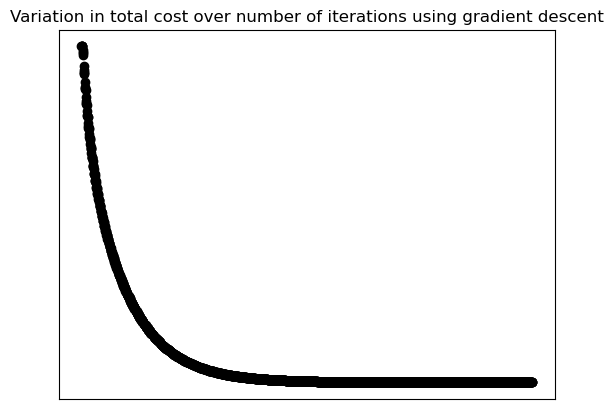

In [55]:
#change back to list
#graph shoes progression of gradient descent in terms of total cost reduction over the number of iterations 
from sklearn import datasets, linear_model
length = len(gradient_graph)
gradient_graph = np.array(gradient_graph)
index_vals = []
for i in range(0, len(gradient_graph)):
    index_vals.append(i)
index_vals = np.array(index_vals)
gradient_graph = gradient_graph.reshape(length, 1)
index_vals = index_vals.reshape(length, 1)
plt.scatter(index_vals, gradient_graph,  color='black')
plt.title("Variation in total cost over number of iterations using gradient descent")
plt.xticks(())
plt.yticks(())
plt.show()
#print(regr.coef_)
#print(regr.intercept_)